In [139]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
data = pd.read_csv('NSE-Tata_Global_Beverages_Limited.csv')
dataset_train=data.iloc[0:930,1:2]
dataset_test=data.iloc[930:,1:2]
training_set = data.iloc[0:930, 1:2].values
testing_set=data.iloc[930:,1:2].values
len(testing_set)

305

In [140]:
data.drop('Last', axis=1, inplace=True)
data.drop('Total Trade Quantity', axis=1, inplace=True)
data.drop('Turnover (Lacs)', axis=1, inplace=True)
print(data.head())
data.to_csv('tata_preprocessed.csv',index= False)
data = data.iloc[::-1]

         Date    Open    High     Low   Close
0  2018-10-08  208.00  222.25  206.85  215.15
1  2018-10-05  217.00  218.60  205.90  209.20
2  2018-10-04  223.50  227.80  216.15  218.20
3  2018-10-03  230.00  237.50  225.75  227.60
4  2018-10-01  234.55  234.60  221.05  230.90


In [150]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

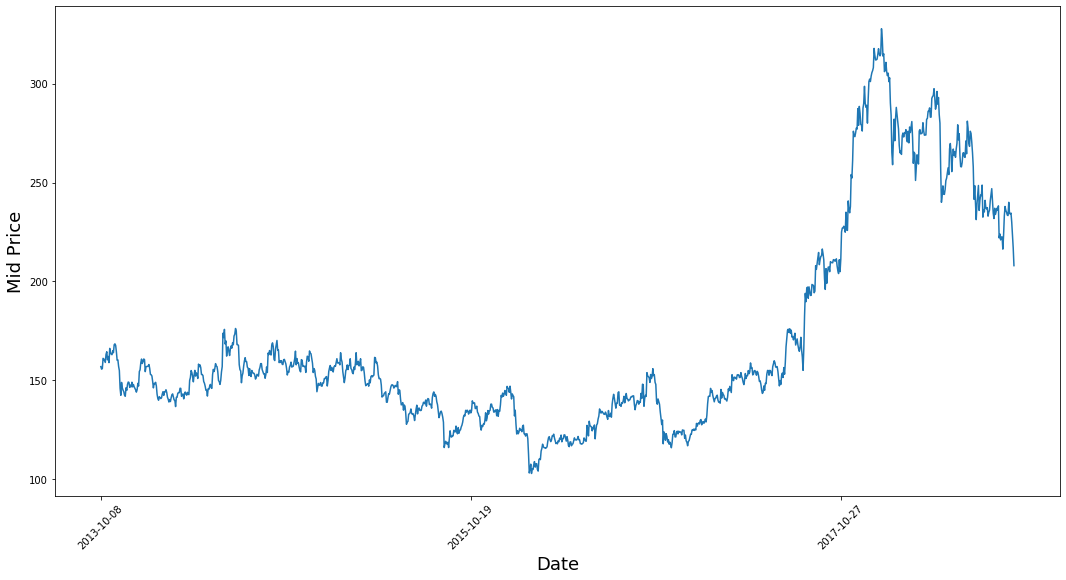

In [153]:
plt.figure(figsize = (18,9))
plt.plot(range(data.shape[0]),(data['Open']))
plt.xticks(range(0,data.shape[0],500),data['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [143]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
len(training_set_scaled)

930

In [144]:
X_train = []
y_train = []
for i in range(10,930):
    X_train.append(training_set_scaled[i-10:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [145]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [146]:
regressor = Sequential()

regressor.add(LSTM(units = 75, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 75))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 200, batch_size = 64)

Epoch 1/200
920/920 [==============================] - 2s 2ms/step - loss: 0.0695
Epoch 2/200
920/920 [==============================] - 1s 628us/step - loss: 0.0129
Epoch 3/200
920/920 [==============================] - 1s 635us/step - loss: 0.0049
Epoch 4/200
920/920 [==============================] - 1s 629us/step - loss: 0.0037
Epoch 5/200
920/920 [==============================] - 1s 630us/step - loss: 0.0033
Epoch 6/200
920/920 [==============================] - 1s 628us/step - loss: 0.0032
Epoch 7/200
920/920 [==============================] - 1s 735us/step - loss: 0.0032
Epoch 8/200
920/920 [==============================] - 1s 691us/step - loss: 0.0036
Epoch 9/200
920/920 [==============================] - 1s 686us/step - loss: 0.0031
Epoch 10/200
920/920 [==============================] - 1s 720us/step - loss: 0.0033
Epoch 11/200
920/920 [==============================] - 1s 702us/step - loss: 0.0032
Epoch 12/200
920/920 [==============================] - 1s 631us/step - loss

920/920 [==============================] - 1s 660us/step - loss: 0.0011
Epoch 193/200
920/920 [==============================] - 1s 635us/step - loss: 0.0010
Epoch 194/200
920/920 [==============================] - 1s 629us/step - loss: 0.0010
Epoch 195/200
920/920 [==============================] - 1s 631us/step - loss: 0.0011
Epoch 196/200
920/920 [==============================] - 1s 628us/step - loss: 9.3075e-04
Epoch 197/200
920/920 [==============================] - 1s 634us/step - loss: 8.3732e-04
Epoch 198/200
920/920 [==============================] - 1s 636us/step - loss: 8.6737e-04
Epoch 199/200
920/920 [==============================] - 1s 631us/step - loss: 0.0012
Epoch 200/200
920/920 [==============================] - 1s 634us/step - loss: 0.0011


In [147]:
real_stock_price = testing_set

In [148]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 10:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(10,305):
    X_test.append(inputs[i-10:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

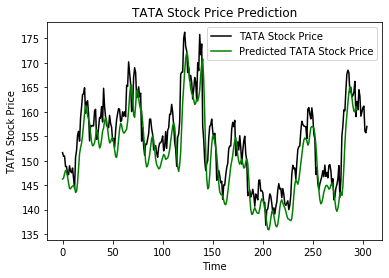

In [149]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()